In [1]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
log_data=pd.read_csv('../Datas/log2.csv',header=None)

In [4]:
log_data

,0,1,2,3
0,busanmovie3,1592324702997,2091580300,...
1,busanmovie6,1592324706150,57137300,...
2,busanmovie2,1592324706460,88587200,...
3,busanmovie5,1592324706787,63388800,...
4,busanmovie9,1592324707150,74762900,...
...,...,...,...,...
995,busanmovie4,1592324882832,31088400,...
996,busanmovie2,1592324883024,33342600,...
997,research10,1592324883185,31458300,...
998,busanmovie5,1592324883350,31817900,...


In [5]:
log_data.columns=['Dataset','Query Time','Execution Time','ManagerId']

In [6]:
log_data.info

<bound method DataFrame.info of          Dataset     Query Time  Execution Time ManagerId
0    busanmovie3  1592324702997      2091580300       ...
1    busanmovie6  1592324706150        57137300       ...
2    busanmovie2  1592324706460        88587200       ...
3    busanmovie5  1592324706787        63388800       ...
4    busanmovie9  1592324707150        74762900       ...
..           ...            ...             ...       ...
995  busanmovie4  1592324882832        31088400       ...
996  busanmovie2  1592324883024        33342600       ...
997   research10  1592324883185        31458300       ...
998  busanmovie5  1592324883350        31817900       ...
999  busanmovie8  1592324883508       106942700       ...

[1000 rows x 4 columns]>

In [7]:
log_data.describe()

,Query Time,Execution Time
count,1.000000e+03,1.000000e+03
mean,1.592325e+12,4.045961e+07
std,5.073051e+04,6.967336e+07
min,1.592325e+12,2.285590e+07
25%,1.592325e+12,2.896428e+07
50%,1.592325e+12,3.103100e+07
75%,1.592325e+12,3.291652e+07
max,1.592325e+12,2.091580e+09


In [31]:
X=log_data[['Dataset','Query Time','Execution Time']][:800]

In [33]:
X

,Dataset,Query Time,Execution Time
0,busanmovie3,1592324702997,2091580300
1,busanmovie6,1592324706150,57137300
2,busanmovie2,1592324706460,88587200
3,busanmovie5,1592324706787,63388800
4,busanmovie9,1592324707150,74762900
...,...,...,...
795,busanmovie3,1592324848226,27697700
796,busanmovie2,1592324848398,30516200
797,busanmovie5,1592324848562,31186700
798,busanmovie3,1592324848744,74708000


In [34]:
X.describe()

,Query Time,Execution Time
count,8.000000e+02,8.000000e+02
mean,1.592325e+12,4.148188e+07
std,4.063815e+04,7.702926e+07
min,1.592325e+12,2.285590e+07
25%,1.592325e+12,2.946925e+07
50%,1.592325e+12,3.131250e+07
75%,1.592325e+12,3.301062e+07
max,1.592325e+12,2.091580e+09


In [35]:
execute_mean=X[['Execution Time']].mean()
execute_std=X[['Execution Time']].std()
X[['Execution Time']]=(X[['Execution Time']]-execute_mean)/execute_std

In [36]:
query_min=X[['Query Time']].min()
X[['Query Time']]=(X[['Query Time']]-query_min)

In [37]:
Dataset_Query=X.groupby('Dataset')['Query Time'].sum().to_frame().reset_index()

In [38]:
Dataset_Execution=X.groupby('Dataset')['Execution Time'].mean().to_frame().reset_index()

In [39]:
Dataset_Query_Frequency=X.groupby('Dataset')['Query Time'].count().to_frame().reset_index()
Dataset_Query_Frequency.rename(columns = {'Query Time' : 'Query Count'}, inplace = True)

In [40]:
X=pd.merge(Dataset_Query,Dataset_Execution,on='Dataset')
X=pd.merge(X,Dataset_Query_Frequency,on='Dataset')

In [41]:
X

,Dataset,Query Time,Execution Time,Query Count
0,MusicDance1,354415,1.101344,4
1,RecommendTour1,611344,-0.070906,8
2,TouristAtt,257014,-0.034421,5
3,busanfestival,603219,0.031184,9
4,busanmovie1,7523216,-0.136356,102
5,busanmovie2,11999793,-0.126661,162
6,busanmovie3,8588730,0.319009,101
7,busanmovie4,6664671,-0.061344,83
8,busanmovie5,10090104,-0.135247,140
9,busanmovie6,4197519,0.177119,56


In [42]:
count_mean=X[['Query Count']].mean()
count_std=X[['Query Count']].std()
X[['Query Count']]=(X[['Query Count']]-count_mean)/count_std

In [43]:
query_mean=X[['Query Time']].mean()
query_std=X[['Query Time']].std()
X[['Query Time']]=(X[['Query Time']]-query_mean) / query_std

In [44]:
X

,Dataset,Query Time,Execution Time,Query Count
0,MusicDance1,-0.926267,1.101344,-0.940831
1,RecommendTour1,-0.861542,-0.070906,-0.864548
2,TouristAtt,-0.950804,-0.034421,-0.921760
3,busanfestival,-0.863589,0.031184,-0.845477
4,busanmovie1,0.879676,-0.136356,0.928117
5,busanmovie2,2.007401,-0.126661,2.072371
6,busanmovie3,1.148097,0.319009,0.909046
7,busanmovie4,0.663393,-0.061344,0.565770
8,busanmovie5,1.526318,-0.135247,1.652812
9,busanmovie6,0.041876,0.177119,0.050856


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB291D4D88>,
      dtype=object)

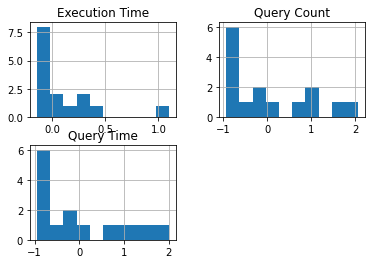

In [45]:
X.hist()

In [46]:
query_hot=set(X[X['Query Time']>X['Query Time'].mean()].index)

In [47]:
execution_hot=set(X[X['Execution Time']>X['Execution Time'].mean()].index)

In [48]:
count_hot=set(X[X['Query Count']>X['Query Count'].mean()].index)

In [49]:
print(query_hot)
print(execution_hot)
print(count_hot)

{4, 5, 6, 7, 8, 9}
{0, 6, 9, 10, 13}
{4, 5, 6, 7, 8, 9}


In [50]:
Hot_Dataset_Counts=round(len(X)*0.3)

In [51]:
hot_index=[]

# Query Time and Execution Time and Query Count
intersect=query_hot.intersection(execution_hot).intersection(count_hot)
hot_index=[data for data in intersect]

intersects=[]
#Query Time and Query Count
intersects.extend(query_hot.intersection(count_hot))
#Execution Time and Query Count
intersects.extend(execution_hot.intersection(count_hot))
#Query Time and Execution Time
intersects.extend(query_hot.intersection(execution_hot))
print(intersects)
while len(hot_index) < Hot_Dataset_Counts:
    data=intersects.pop(0)
    if data in hot_index:
        continue
    hot_index.append(data)

[4, 5, 6, 7, 8, 9, 9, 6, 9, 6]


In [52]:
hot_index

[9, 6, 4, 5]

In [53]:
Y=pd.DataFrame(np.zeros(len(X)))

In [54]:
hots=list(hot_index)

In [55]:
Y.loc[hots]=1.0

In [56]:
Y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,0.0
8,0.0
9,1.0


In [57]:
X=X[["Query Time","Execution Time","Query Count"]]

In [58]:
X

,Query Time,Execution Time,Query Count
0,-0.926267,1.101344,-0.940831
1,-0.861542,-0.070906,-0.864548
2,-0.950804,-0.034421,-0.921760
3,-0.863589,0.031184,-0.845477
4,0.879676,-0.136356,0.928117
5,2.007401,-0.126661,2.072371
6,1.148097,0.319009,0.909046
7,0.663393,-0.061344,0.565770
8,1.526318,-0.135247,1.652812
9,0.041876,0.177119,0.050856


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [60]:
Names=["Decision Tree",
       "Linear Discriminant Analysis",
       "Quadratic Discriminant Analysis",
       "Gaussian NB",
       "Gaussian ProcessClassifier",
       "ExtraTreeClassifier",
       "RidgeClassifier",
       "KNN Classifier"]

In [61]:
Classifiers=[
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    GaussianProcessClassifier(kernel=1.0*RBF(1.0)),
    ExtraTreesClassifier(),
    RidgeClassifier(),
    KNeighborsClassifier(n_neighbors = 5)
]

In [62]:
results=[]
for model in Classifiers:
    model=model.fit(X_train,y_train)
    predict=model.predict(X_test)
    results.append(round(accuracy_score(y_test,predict)*100))
#print("Model Name: %s \t\t\tAccuracy: %.2f" % (name, (accuracy_score(y_test, predict) * 100)),"%") # 정확도 % 계산

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\

In [63]:
results

[60.0, 80.0, 60.0, 60.0, 60.0, 60.0, 80.0, 60.0]

<Figure size 864x576 with 0 Axes>

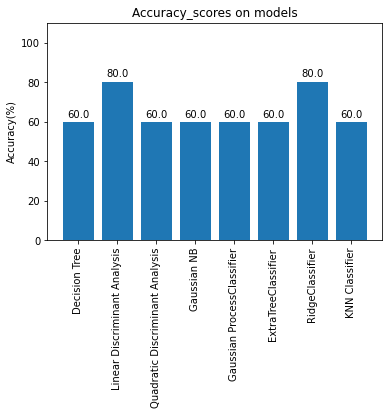

In [64]:
plt.figure(figsize=(12,8))
fig,ax=plt.subplots()
barplot=plt.bar(Names,results)
for idx,rect in enumerate(barplot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
            results[idx],
            ha='center', va='bottom', rotation=0)
plt.title('Accuracy_scores on models')
plt.ylim(0,110)
plt.ylabel('Accuracy(%)')
plt.xticks(Names,rotation=90)
plt.show()